<a href="https://colab.research.google.com/github/ArmoyTuhin/Artificial-Intelligence/blob/main/tribal_dress_classification_with_vision_transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/Dataset/tribal_data/"

In [ ]:
!pip install -U tensorflow-addons

     |████████████████████████████████| 1.1 MB 3.9 MB/s 


In [ ]:
import numpy as np
import glob
from os import listdir
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from sklearn.model_selection import train_test_split


In [ ]:
# !unzip /content/tribal_dress.zip

In [ ]:
import os
def get_label(file_path):
    path_list = file_path.split(os.sep)
    return path_list[-2]

In [ ]:
x_train=[]
y_train=[]
for name in glob.glob("/content/drive/MyDrive/Dataset/tribal_data/train/*/*"):
  # print(name)
  label = get_label(name)
  # print(label)
  img = load_img(name, target_size=(32, 32))
  img = img_to_array(img)
  x_train.append(img)
  y_train.append(label)

In [ ]:
print(y_train)

[[[1]]

 [[1]]

 [[1]]

 [[1]]

 [[1]]

 [[1]]

 [[1]]

 [[1]]

 [[1]]

 [[1]]

 [[1]]

 [[1]]

 [[1]]

 [[1]]

 [[1]]

 [[1]]

 [[1]]

 [[1]]

 [[1]]

 [[1]]

 [[1]]

 [[1]]

 [[1]]

 [[1]]

 [[1]]

 [[1]]

 [[1]]

 [[1]]

 [[1]]

 [[1]]

 [[1]]

 [[1]]

 [[1]]

 [[1]]

 [[1]]

 [[1]]

 [[1]]

 [[1]]

 [[1]]

 [[1]]

 [[1]]

 [[1]]

 [[1]]

 [[1]]

 [[1]]

 [[1]]

 [[1]]

 [[1]]

 [[1]]

 [[1]]

 [[1]]

 [[1]]

 [[1]]

 [[1]]

 [[1]]

 [[1]]

 [[1]]

 [[1]]

 [[1]]

 [[1]]

 [[1]]

 [[1]]

 [[1]]

 [[1]]

 [[1]]

 [[1]]

 [[1]]

 [[1]]

 [[1]]

 [[1]]

 [[1]]

 [[1]]

 [[1]]

 [[1]]

 [[1]]

 [[1]]

 [[1]]

 [[1]]

 [[1]]

 [[1]]

 [[1]]

 [[1]]

 [[1]]

 [[0]]

 [[0]]

 [[0]]

 [[0]]

 [[0]]

 [[0]]

 [[0]]

 [[0]]

 [[0]]

 [[0]]

 [[0]]

 [[0]]

 [[0]]

 [[0]]

 [[0]]

 [[0]]

 [[0]]

 [[0]]

 [[0]]

 [[0]]

 [[0]]

 [[0]]

 [[0]]

 [[0]]

 [[0]]

 [[0]]

 [[0]]

 [[0]]

 [[0]]

 [[0]]

 [[0]]

 [[0]]

 [[0]]

 [[0]]

 [[0]]

 [[0]]

 [[0]]

 [[0]]

 [[0]]

 [[0]]

 [[0]]

 [[0]]



In [ ]:
x_test=[]
y_test=[]
for name in glob.glob("/content/drive/MyDrive/Dataset/tribal_data/test/*/*"):
  # print(name)
  label = get_label(name)
  # print(label)
  img = load_img(name, target_size=(32, 32))
  img = img_to_array(img)
  x_test.append(img)
  y_test.append(label)

In [ ]:
print(y_train)

['monipuri', 'monipuri', 'monipuri', 'monipuri', 'monipuri', 'monipuri', 'monipuri', 'monipuri', 'monipuri', 'monipuri', 'monipuri', 'monipuri', 'monipuri', 'monipuri', 'monipuri', 'monipuri', 'monipuri', 'monipuri', 'monipuri', 'monipuri', 'monipuri', 'monipuri', 'monipuri', 'monipuri', 'monipuri', 'monipuri', 'monipuri', 'monipuri', 'monipuri', 'monipuri', 'monipuri', 'monipuri', 'monipuri', 'monipuri', 'monipuri', 'monipuri', 'monipuri', 'monipuri', 'monipuri', 'monipuri', 'monipuri', 'monipuri', 'monipuri', 'monipuri', 'monipuri', 'monipuri', 'monipuri', 'monipuri', 'monipuri', 'monipuri', 'monipuri', 'monipuri', 'monipuri', 'monipuri', 'monipuri', 'monipuri', 'monipuri', 'monipuri', 'monipuri', 'monipuri', 'monipuri', 'monipuri', 'monipuri', 'monipuri', 'monipuri', 'monipuri', 'monipuri', 'monipuri', 'monipuri', 'monipuri', 'monipuri', 'monipuri', 'monipuri', 'monipuri', 'monipuri', 'monipuri', 'monipuri', 'monipuri', 'monipuri', 'monipuri', 'monipuri', 'monipuri', 'monipuri', 'ch

In [ ]:
# import gc

# y_train = None
# del y_train
# gc.collect()

# y_test = None
# del y_test
# gc.collect()

# y_val = None
# del y_val
# gc.collect

# x_train = None
# del x_train
# gc.collect()

# x_test = None
# del x_test
# gc.collect()

# x_train = None
# del x_train
# gc.collect()

# x_val = None
# del x_val
# gc.collect()



0

In [ ]:
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
label_encoder = LabelEncoder()
y_train= label_encoder.fit_transform(y_train)
y_test= label_encoder.fit_transform(y_test)
# y_val= label_encoder.fit_transform(y_val)

In [ ]:
print(y_train.shape, y_test.shape)

(150,) (38,)


In [ ]:
# lb = LabelBinarizer()
# y_train = lb.fit_transform(y_train)
# y_test = lb.fit_transform(y_test)

In [ ]:
# print(y_train.shape, y_test.shape)

(150, 1) (38, 1)


In [ ]:
# def get_val(X, y):
#   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#   return X_train, X_test, y_train, y_test
  
# x_train, x_val, y_train, y_val = get_val(x_train, y_train)

In [ ]:
# print(x_train.shape, x_val.shape, y_train.shape, y_val.shape)

AttributeError: ignored

In [ ]:

### probably this cell is not necessary as label has already been encoded
y_train = [[i] for i in y_train]
y_test = [[i] for i in y_test]
# y_val = [[i] for i in y_val]

In [ ]:
import numpy as np
x_train=np.array(x_train)
y_train=np.array(y_train)
x_test=np.array(x_test)
y_test=np.array(y_test)
# x_val=np.array(x_val)
# y_val=np.array(y_val)

In [ ]:
print(x_train.shape, x_val.shape, y_train.shape, y_val.shape, x_test.shape, y_test.shape)

(120, 32, 32, 3) (30, 32, 32, 3) (120, 1) (30, 1) (38, 32, 32, 3) (38, 1)


In [ ]:
num_classes = 2
input_shape =(32,32,3)

Configure the hyperparameters

In [ ]:
learning_rate = 0.001
weight_decay = 0.0001
batch_size = 8
num_epochs = 100
image_size = 72  # We'll resize input images to this size
patch_size = 6  # Size of the patches to be extract from the input images
num_patches = (image_size // patch_size) ** 2
projection_dim = 64
num_heads = 4
transformer_units = [
    projection_dim * 2,
    projection_dim,
]  # Size of the transformer layers
transformer_layers = 8
mlp_head_units = [2048, 1024]  # Size of the dense layers of the final classifier


Use data augmentation

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.Resizing(image_size, image_size),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.02),
        layers.RandomZoom(
            height_factor=0.2, width_factor=0.2
        ),
    ],
    name="data_augmentation",
)
# Compute the mean and the variance of the training data for normalization.
data_augmentation.layers[0].adapt(x_train)


Implement multilayer perceptron (MLP)

In [ ]:

def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x


Implement patch creation as a layer

In [ ]:

class Patches(layers.Layer):
    def __init__(self, patch_size):
        super(Patches, self).__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches


display patches for a sample image

Image size: 72 X 72
Patch size: 6 X 6
Patches per image: 144
Elements per patch: 108


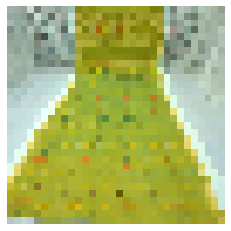

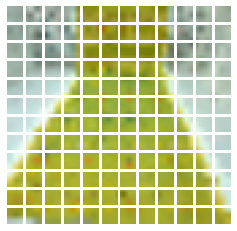

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
image = x_train[np.random.choice(range(x_train.shape[0]))]
plt.imshow(image.astype("uint8"))
plt.axis("off")

resized_image = tf.image.resize(
    tf.convert_to_tensor([image]), size=(image_size, image_size)
)
patches = Patches(patch_size)(resized_image)
print(f"Image size: {image_size} X {image_size}")
print(f"Patch size: {patch_size} X {patch_size}")
print(f"Patches per image: {patches.shape[1]}")
print(f"Elements per patch: {patches.shape[-1]}")

n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(4, 4))
for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = tf.reshape(patch, (patch_size, patch_size, 3))
    plt.imshow(patch_img.numpy().astype("uint8"))
    plt.axis("off")

Implement the patch encoding layer

In [ ]:

class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded


In [ ]:

def create_vit_classifier():
    inputs = layers.Input(shape=input_shape)
    # Augment data.
    augmented = data_augmentation(inputs)
    # Create patches.
    patches = Patches(patch_size)(augmented)
    # Encode patches.
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    # Add MLP.
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)

    # Classify outputs.
    logits = layers.Dense(1, activation='sigmoid')(features)
    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=logits)
    return model


In [ ]:
import tensorflow.keras.backend as K
def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall_keras = true_positives / (possible_positives + K.epsilon())
    return recall_keras


def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision_keras = true_positives / (predicted_positives + K.epsilon())
    return precision_keras

def f1(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return 2 * ((p * r) / (p + r + K.epsilon()))

In [ ]:

def run_experiment(model):
    optimizer = tfa.optimizers.AdamW(
        learning_rate=learning_rate, weight_decay=weight_decay
    )

    model.compile(
        optimizer=optimizer,
        loss="binary_crossentropy",
        metrics=[
            keras.metrics.Accuracy(name="accuracy"),
            keras.metrics.FalsePositives(name="kl"),
            recall,
            precision, 
            f1
        ]
    )

    checkpoint_filepath = "/content/drive/MyDrive/"
    checkpoint_callback = keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_accuracy",
        save_freq="epoch",
        save_best_only=True,
        save_weights_only=True,
    )

    history = model.fit(
        x=x_train,
        y=y_train,
        batch_size=batch_size,
        epochs=num_epochs,
        validation_split=0.1,
        callbacks=[checkpoint_callback]
    )

    model.load_weights(checkpoint_filepath)
    _, accuracy, top_5_accuracy, recall_2, precision_2, f1_2 = model.evaluate(x_test, y_test)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")
    print(f"Test top 5 accuracy: {round(top_5_accuracy * 100, 2)}%")
    print(f"Test recall: {round(recall_2 * 100, 2)}%")
    print(f"Test precision: {round(precision_2 * 100, 2)}%")
    print(f"Test F1 score: {round(f1_2 * 100, 2)}%")


    return history


vit_classifier = create_vit_classifier()
history = run_experiment(vit_classifier)


Epoch 1/100
17/17 [==============================] - 19s 275ms/step - loss: 2.7524 - accuracy: 0.3111 - kl: 19.0000 - recall: 0.8095 - precision: 0.8149 - f1: 0.7759 - val_loss: 4.6551 - val_accuracy: 0.0000e+00 - val_kl: 7.0000 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00 - val_f1: 0.0000e+00
Epoch 2/100
17/17 [==============================] - 2s 92ms/step - loss: 2.7449 - accuracy: 0.4074 - kl: 11.0000 - recall: 0.8529 - precision: 0.8809 - f1: 0.8502 - val_loss: 0.0747 - val_accuracy: 0.0000e+00 - val_kl: 1.0000 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00 - val_f1: 0.0000e+00
Epoch 3/100
17/17 [==============================] - 1s 86ms/step - loss: 2.6952 - accuracy: 0.4444 - kl: 14.0000 - recall: 0.8840 - precision: 0.8605 - f1: 0.8496 - val_loss: 0.0530 - val_accuracy: 0.0000e+00 - val_kl: 0.0000e+00 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00 - val_f1: 0.0000e+00
Epoch 4/100
17/17 [==============================] - 1s 86ms/step - loss: 5.1689 - accuracy

KeyboardInterrupt: ignored

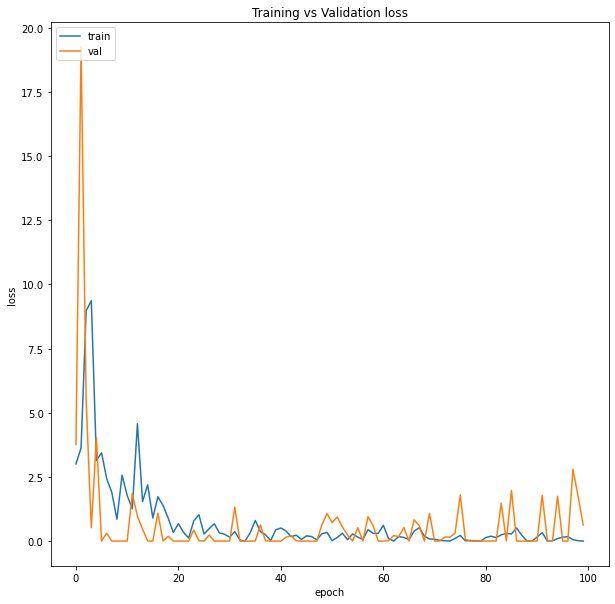

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training vs Validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

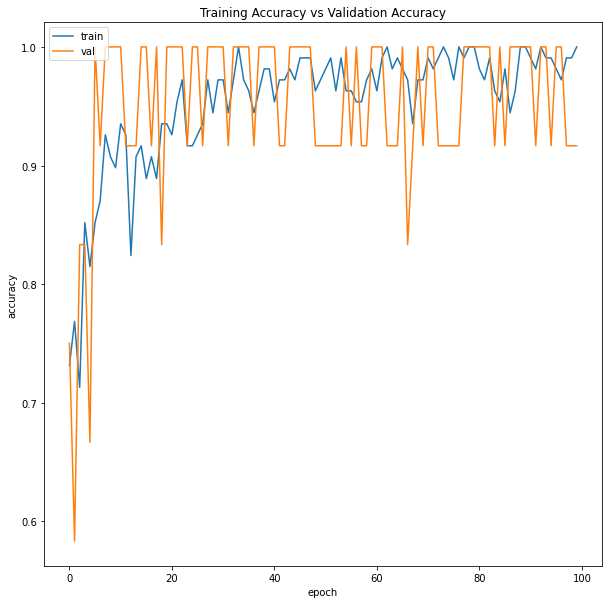

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy vs Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

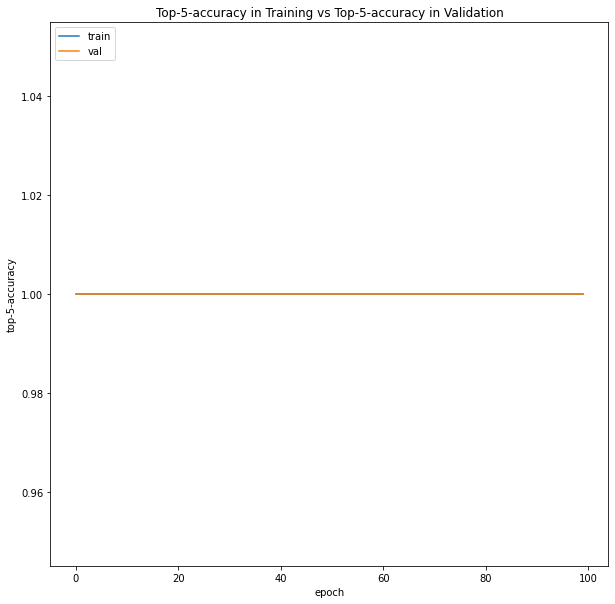

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(history.history['top-5-accuracy'])
plt.plot(history.history['val_top-5-accuracy'])
plt.title('Top-5-accuracy in Training vs Top-5-accuracy in Validation')
plt.ylabel('top-5-accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

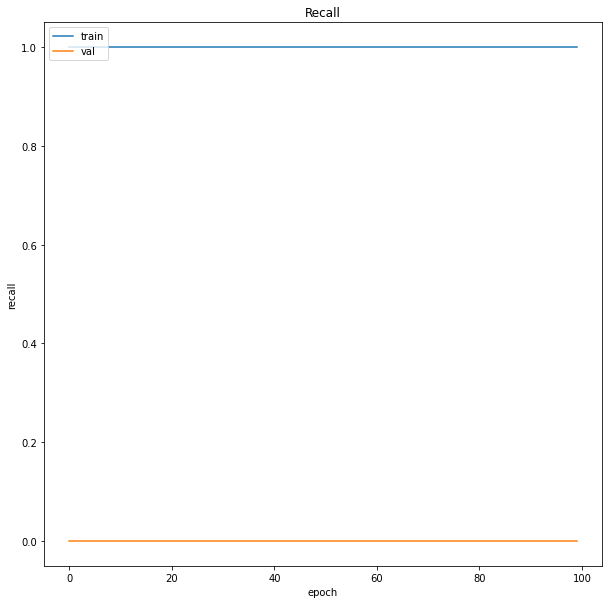

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.title('Recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

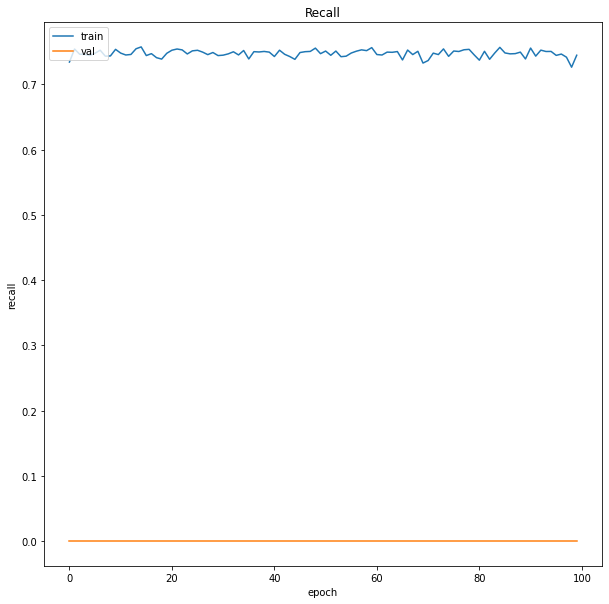

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(history.history['f1'])
plt.plot(history.history['val_f1'])
plt.title('Recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

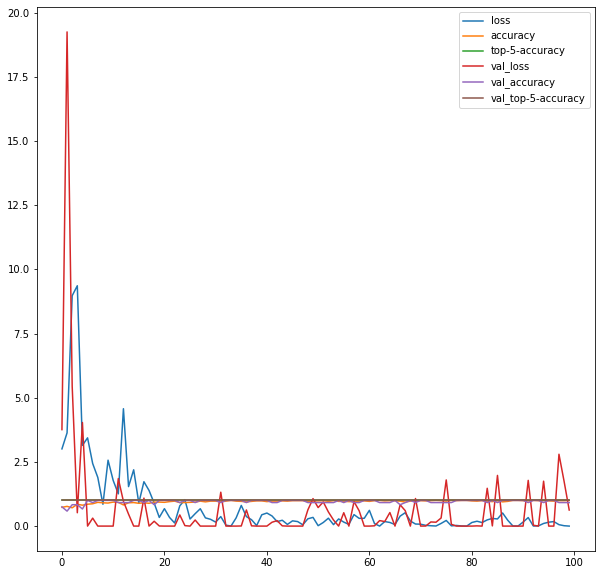

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(10,10))
plt.show()

In [ ]:
print(y_test)

[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/mymodel')

In [ ]:
model.summary()

Model: "model_25"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_26 (InputLayer)          [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 data_augmentation (Sequential)  (None, 72, 72, 3)   7           ['input_26[0][0]']               
                                                                                                  
 patches_28 (Patches)           (None, None, 108)    0           ['data_augmentation[0][0]']      
                                                                                                  
 patch_encoder_25 (PatchEncoder  (None, 144, 64)     16192       ['patches_28[0][0]']             
 )                                                                                         

In [ ]:
y_pred = model.predict(x_test, verbose=1)
y_pred = np.rint(y_pred)
y_pred = y_pred.astype(int)



In [ ]:
print(y_pred)

[[-42  35]
 [-41  36]
 [-43  45]
 [-43  43]
 [-39  39]
 [-43  43]
 [-41  33]
 [-31  31]
 [-34  34]
 [-44  48]
 [-29  27]
 [-44  40]
 [-41  37]
 [-36  38]
 [-40  40]
 [-28  31]
 [-24  23]
 [-29  32]
 [-30  34]
 [-50  51]
 [-25  23]
 [-37  32]
 [-13   4]
 [-20  16]
 [-18   9]
 [ 13 -22]
 [  1  -8]
 [-11   7]
 [ -4   0]
 [ -3  -4]
 [-23   9]
 [-11 -12]
 [  5 -12]
 [  3 -12]
 [  1 -10]
 [ 14 -30]
 [ 12 -21]
 [  3 -12]]


In [ ]:
print(y_test)

[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


In [ ]:
from sklearn.metrics import classification_report

label_names = ['Depressed_Fracture', 'Linear_Fracture']
print(classification_report(y_test, y_pred, target_names=label_names, zero_division=1))

ValueError: ignored

After 100 epochs, the ViT model achieves around 55% accuracy and
82% top-5 accuracy on the test data. These are not competitive results on the CIFAR-100 dataset,
as a ResNet50V2 trained from scratch on the same data can achieve 67% accuracy.

Note that the state of the art results reported in the
[paper](https://arxiv.org/abs/2010.11929) are achieved by pre-training the ViT model using
the JFT-300M dataset, then fine-tuning it on the target dataset. To improve the model quality
without pre-training, you can try to train the model for more epochs, use a larger number of
Transformer layers, resize the input images, change the patch size, or increase the projection dimensions. 
Besides, as mentioned in the paper, the quality of the model is affected not only by architecture choices, 
but also by parameters such as the learning rate schedule, optimizer, weight decay, etc.
In practice, it's recommended to fine-tune a ViT model
that was pre-trained using a large, high-resolution dataset.